In [32]:
import joypy
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer

# garbage
import gc; gc.enable()

# warnings
import warnings
warnings.filterwarnings("ignore")

In [33]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [34]:
cancer = load_breast_cancer()
data, labels, y = cancer.data, cancer.feature_names, cancer.target

df = pd.DataFrame(data, columns=labels)
target = 'TARGET'
df[target] = y # isBenign
df.sample(8)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
397,12.80,17.46,83.05,508.3,0.08044,0.08895,0.073900,0.040830,0.1574,0.05750,...,21.06,90.72,591.0,0.09534,0.18120,0.190100,0.08296,0.1988,0.07053,1
183,11.41,14.92,73.53,402.0,0.09059,0.08155,0.061810,0.023610,0.1167,0.06217,...,17.70,79.12,467.2,0.11210,0.16100,0.164800,0.06296,0.1811,0.07427,1
20,13.08,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.189000,0.07283,0.3184,0.08183,1
276,11.33,14.16,71.79,396.6,0.09379,0.03872,0.001487,0.003333,0.1954,0.05821,...,18.99,77.37,458.0,0.12590,0.07348,0.004955,0.01111,0.2758,0.06386,1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.26540,0.4601,0.11890,0
500,15.04,16.74,98.73,689.4,0.09883,0.13640,0.077210,0.061420,0.1668,0.06869,...,20.43,109.70,856.9,0.11350,0.21760,0.185600,0.10180,0.2177,0.08549,1
26,14.58,21.53,97.41,644.8,0.10540,0.18680,0.142500,0.087830,0.2252,0.06924,...,33.21,122.40,896.9,0.15250,0.66430,0.553900,0.27010,0.4264,0.12750,0
89,14.64,15.24,95.77,651.9,0.11320,0.13390,0.099660,0.070640,0.2116,0.06346,...,18.24,109.40,803.6,0.12770,0.30890,0.260400,0.13970,0.3151,0.08473,1


In [95]:
df[target].value_counts()

1    357
0    212
Name: TARGET, dtype: int64

In [96]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [97]:
df.groupby(target).describe()

mean radius                                                             \
             count       mean       std     min     25%     50%    75%    max   
TARGET                                                                          
0            212.0  17.462830  3.203971  10.950  15.075  17.325  19.59  28.11   
1            357.0  12.146524  1.780512   6.981  11.080  12.200  13.37  17.85   

       mean texture             ... worst symmetry          \
              count       mean  ...            75%     max   
TARGET                          ...                          
0             212.0  21.604906  ...       0.359225  0.6638   
1             357.0  17.914762  ...       0.298300  0.4228   

       worst fractal dimension                                         \
                         count      mean       std      min       25%   
TARGET                                                                  
0                        212.0  0.091530  0.021553  0.05504  0.076302   
1                        357.0  0.079442  0.013804  0.05521  0.070090   

                                   
            50%       75%     max  
TARGET                             
0       0.08760  0.102625  0.2075  
1       0.07712  0.085410  0.1486  

[2 rows x 240 columns]

In [56]:
used_cols = [c for c in df.columns.tolist() if c not in [target]]

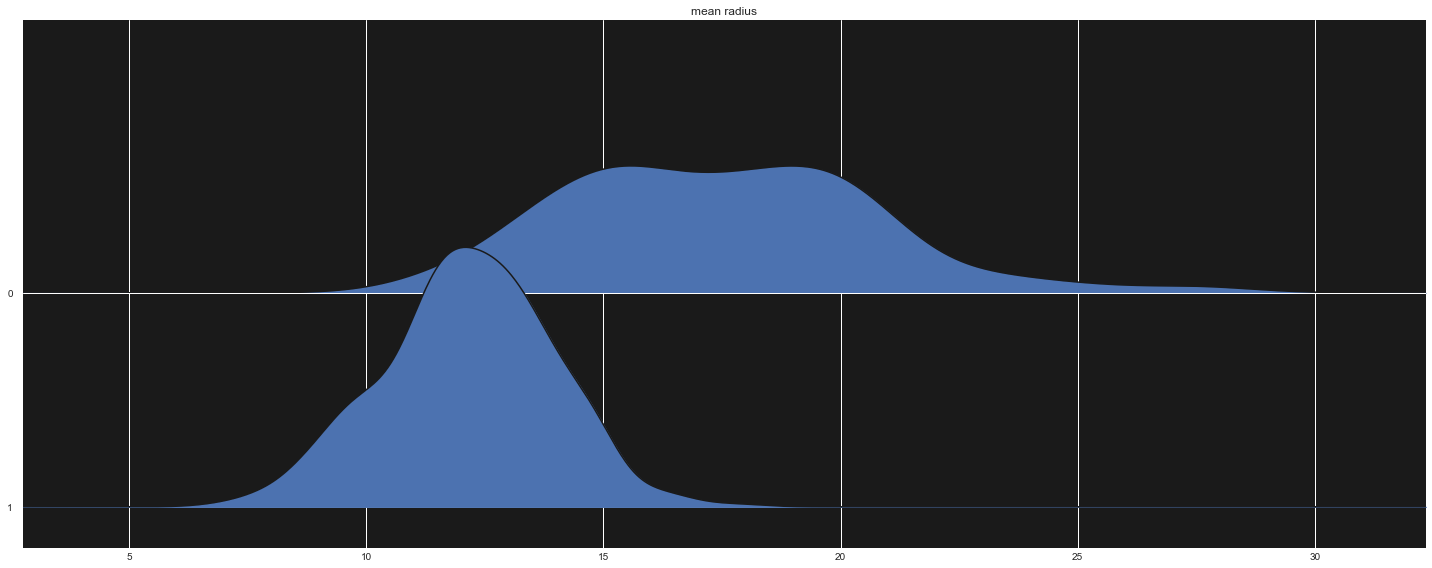

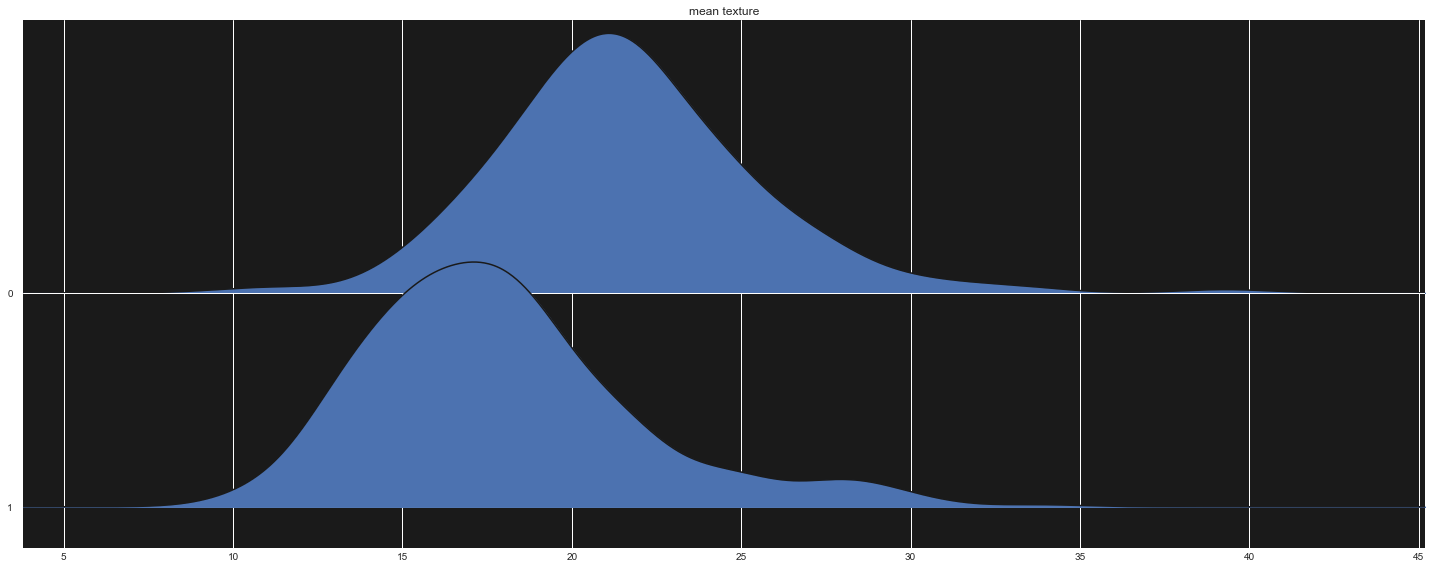

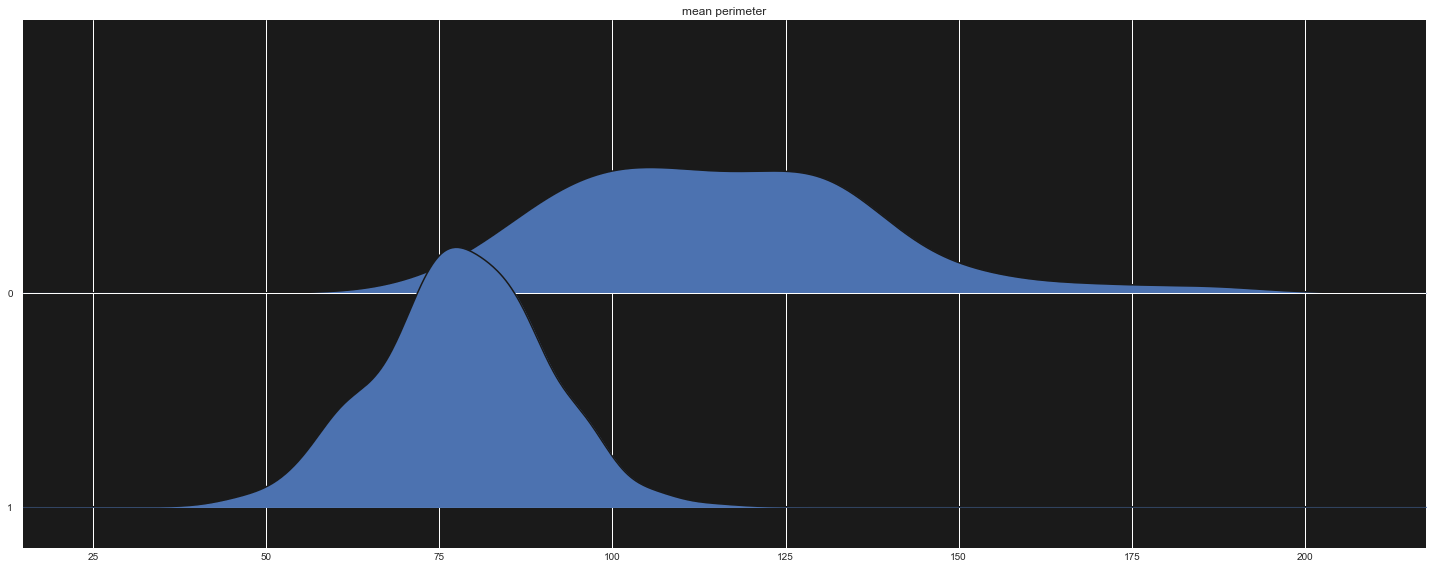

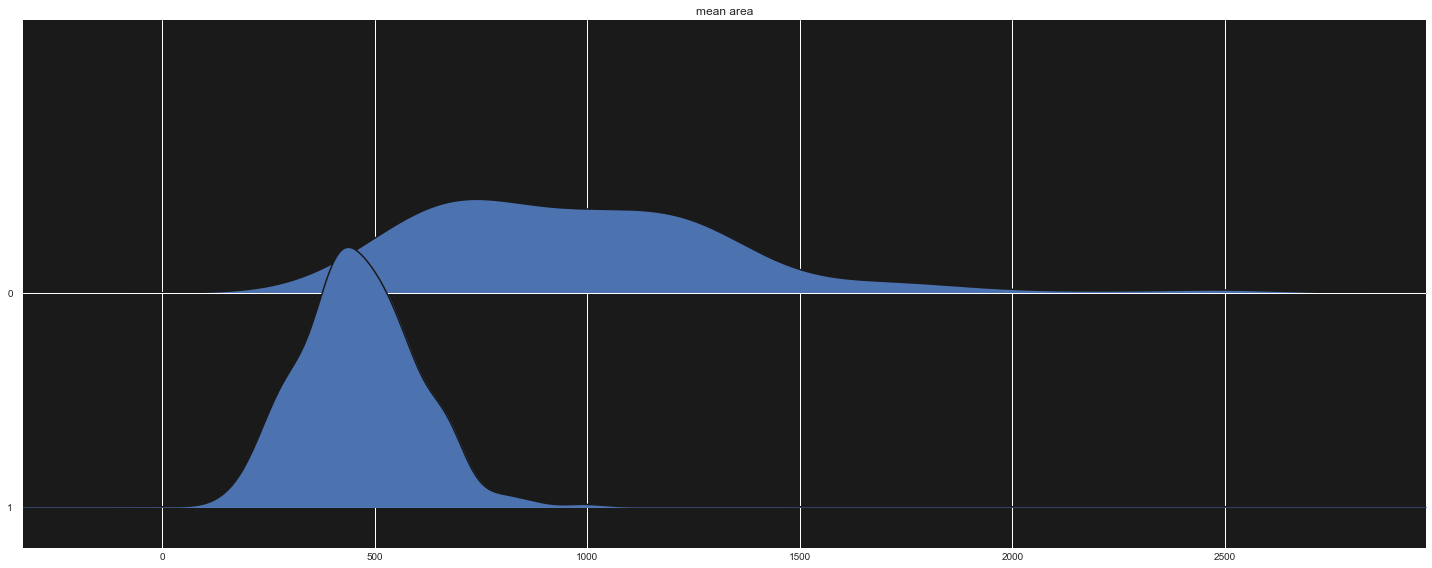

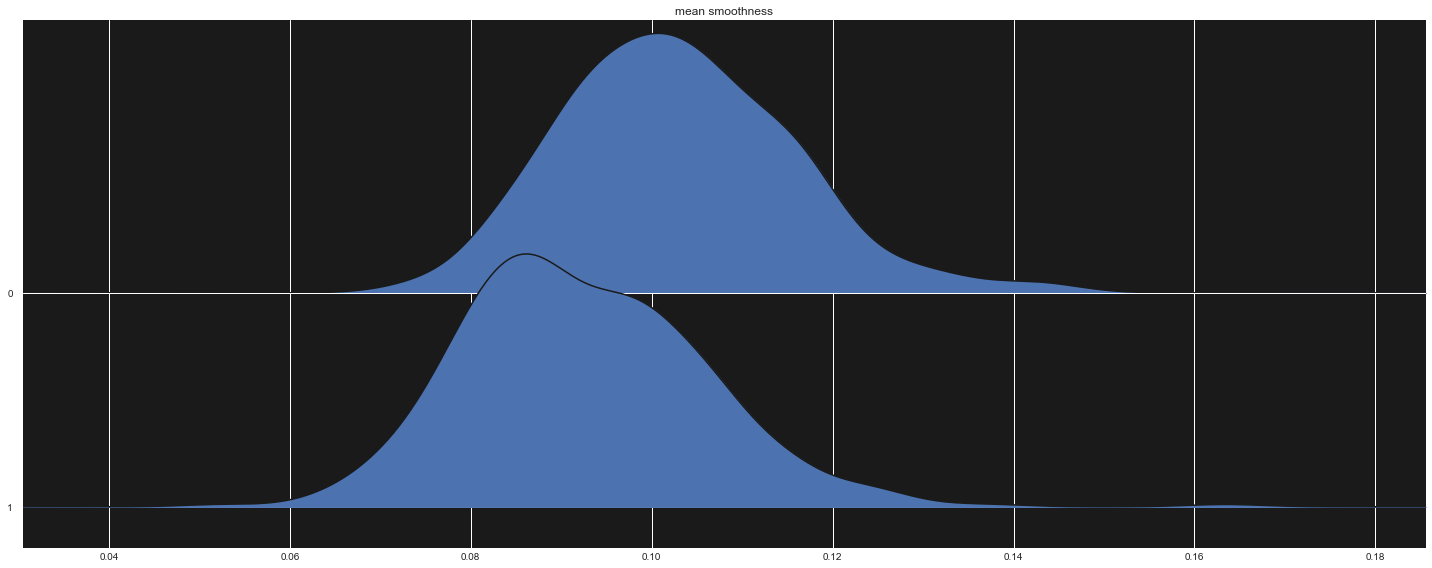

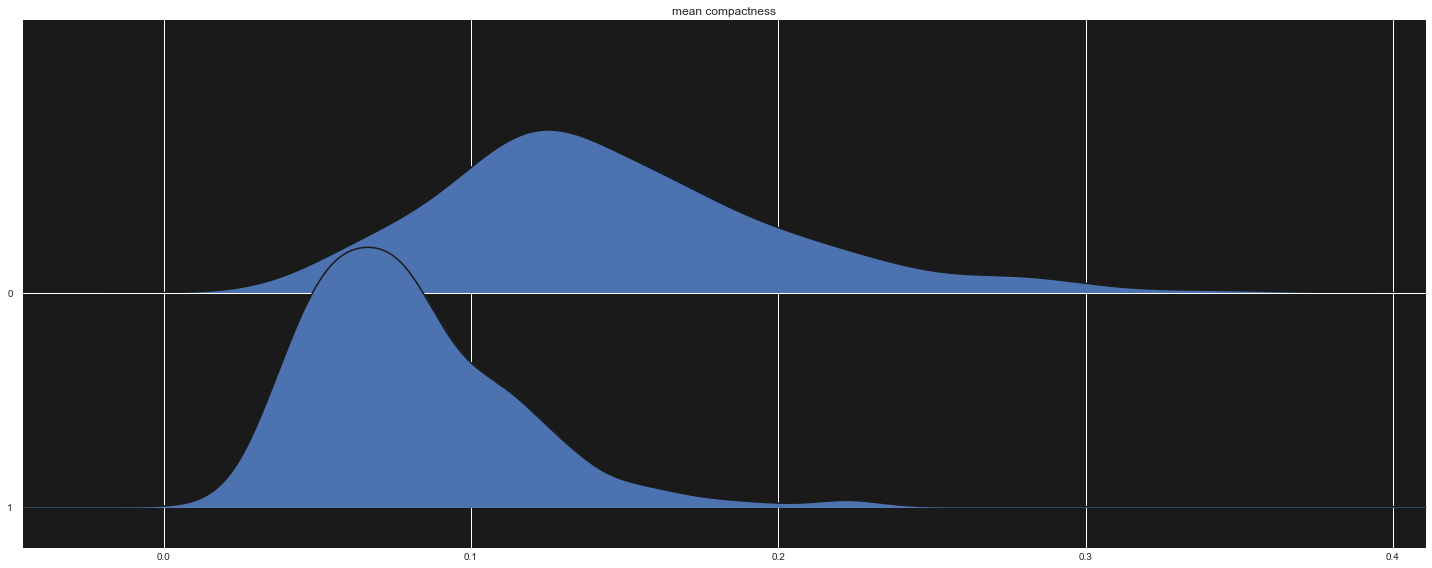

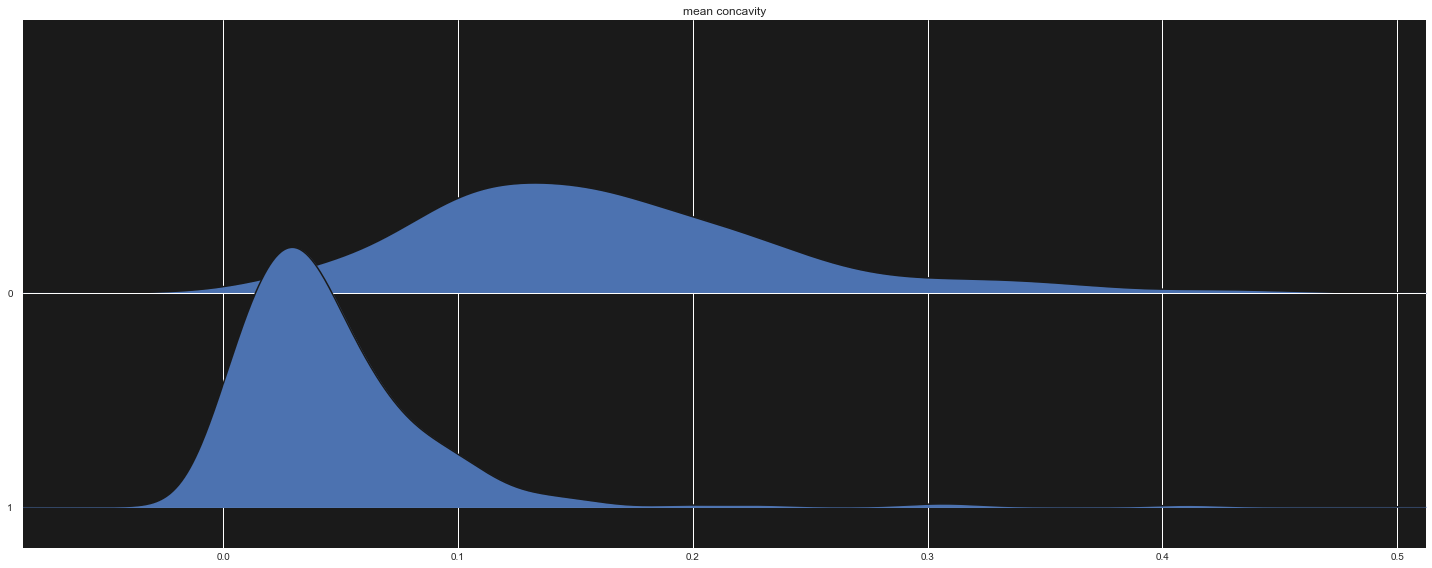

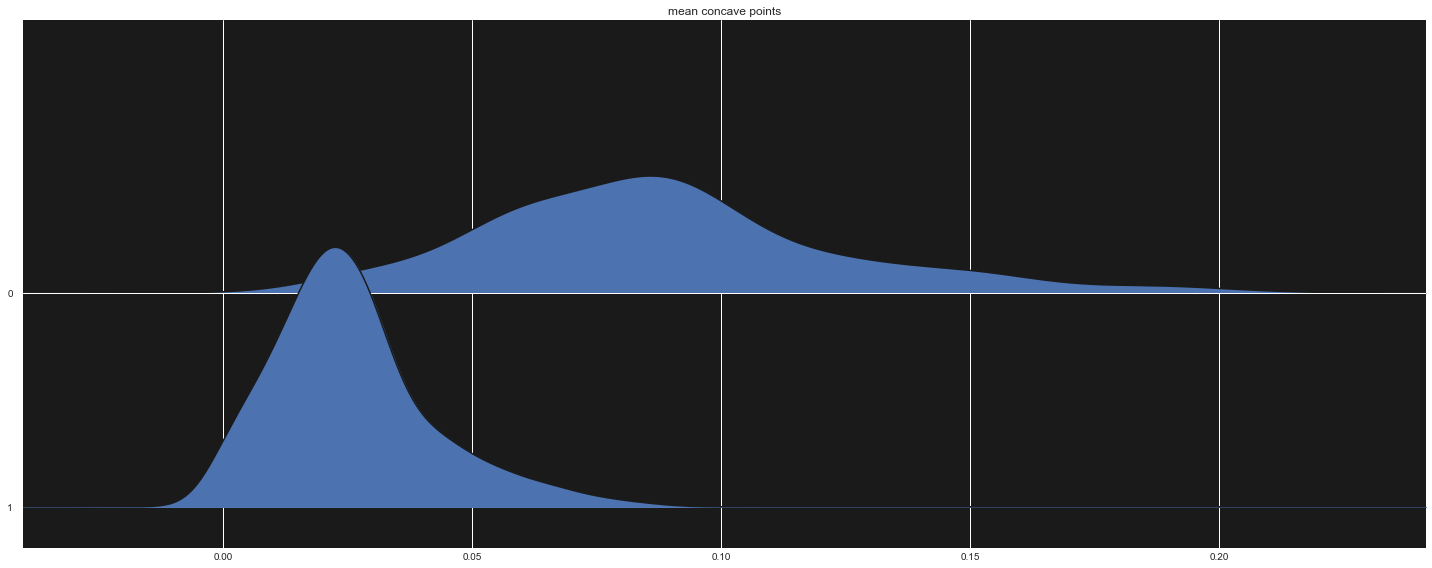

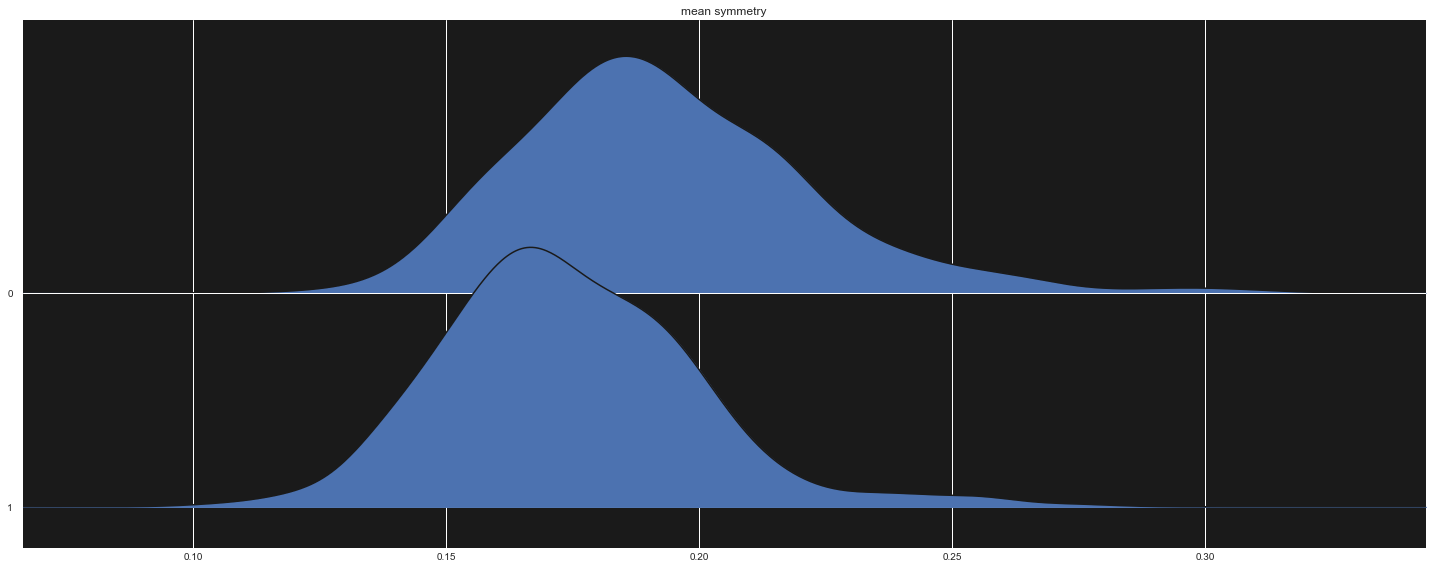

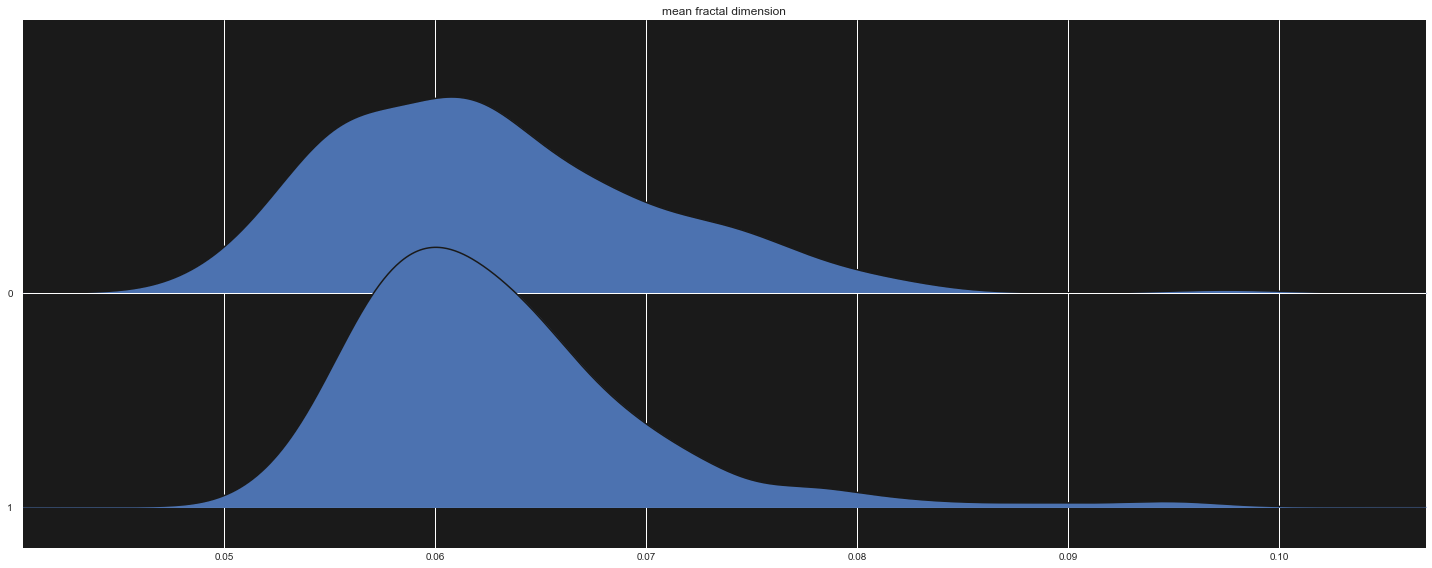

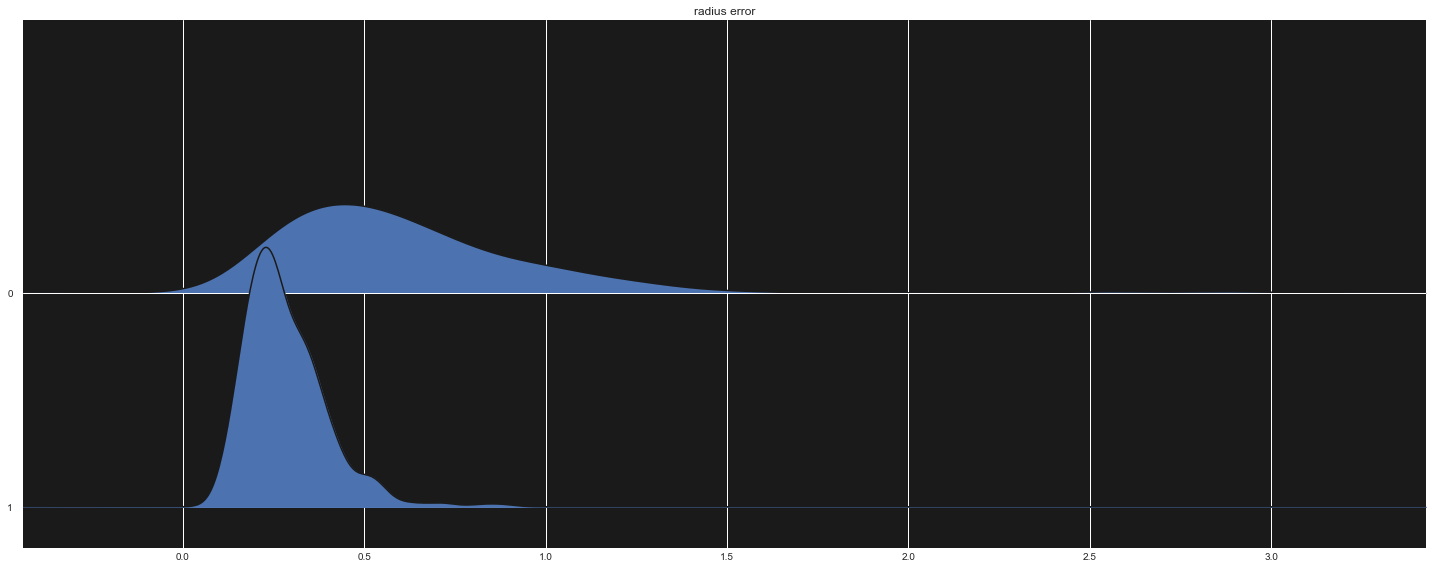

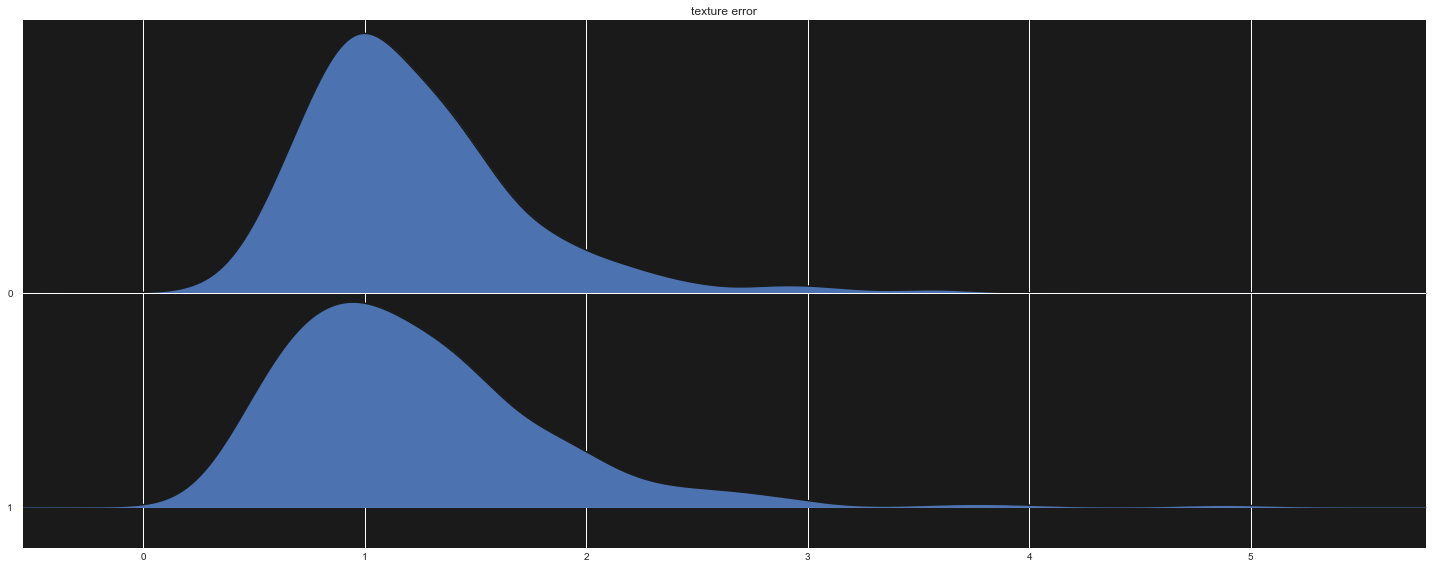

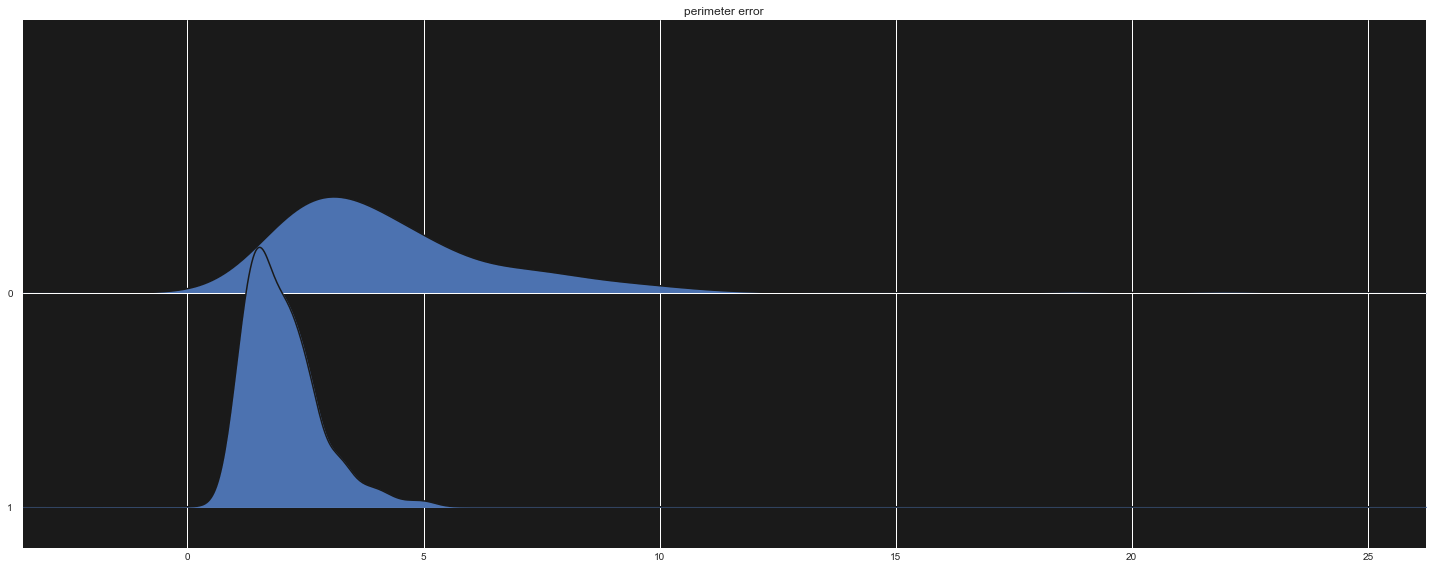

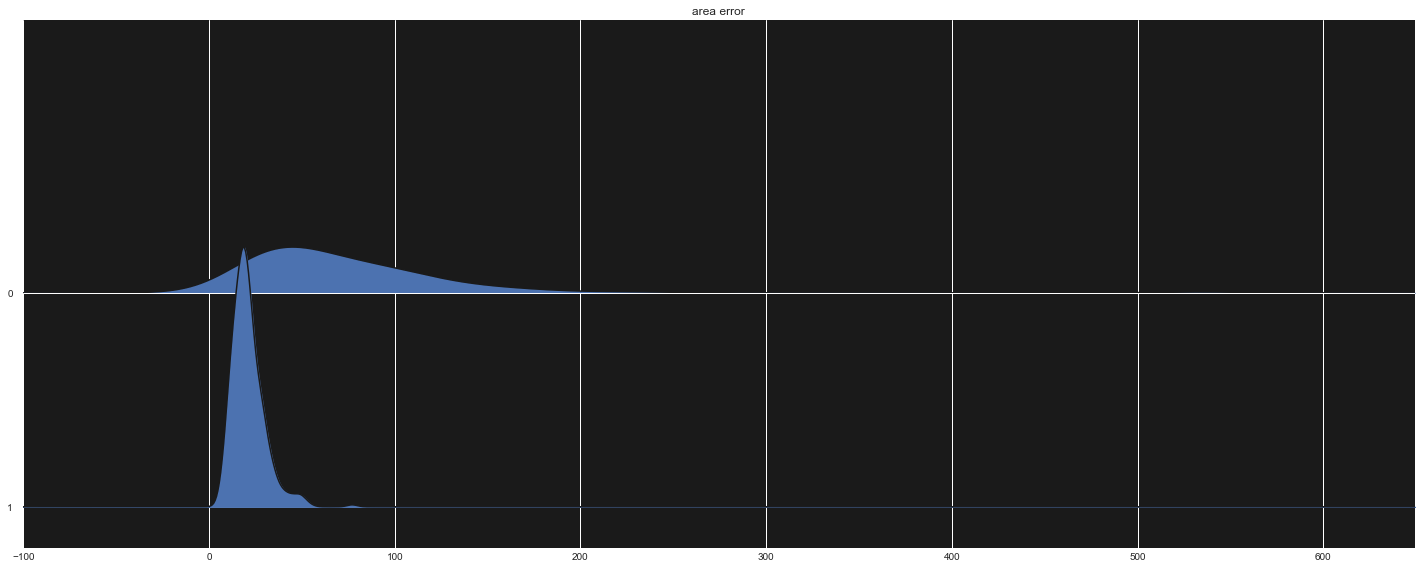

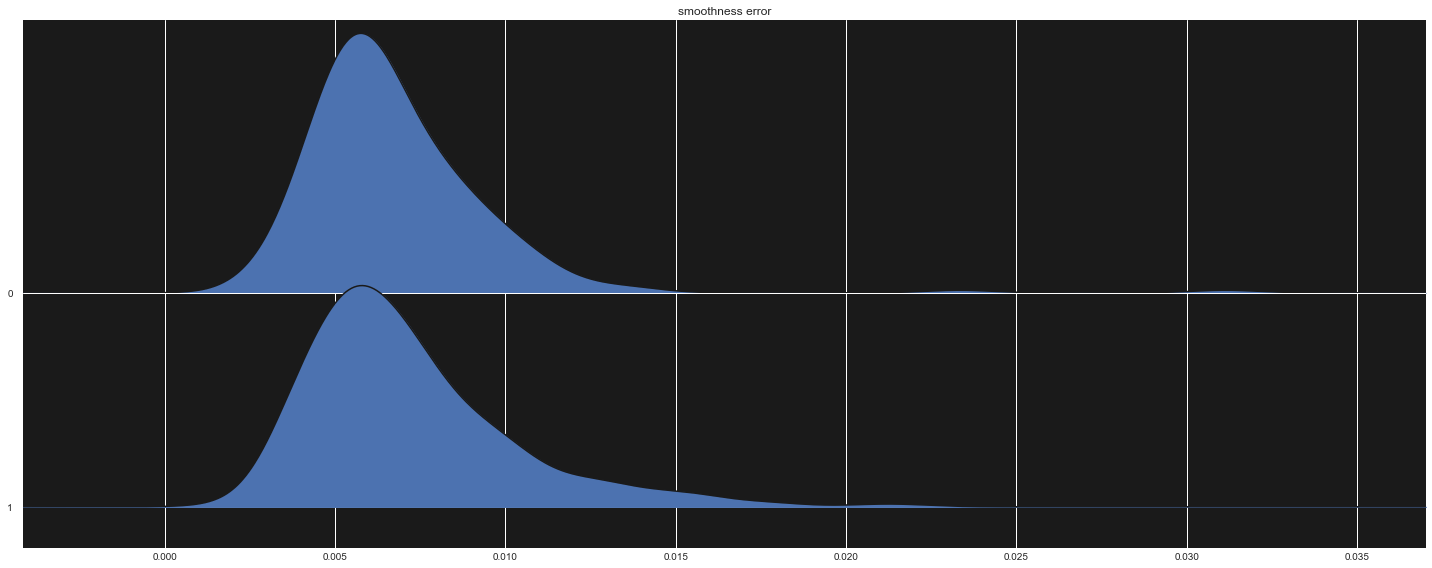

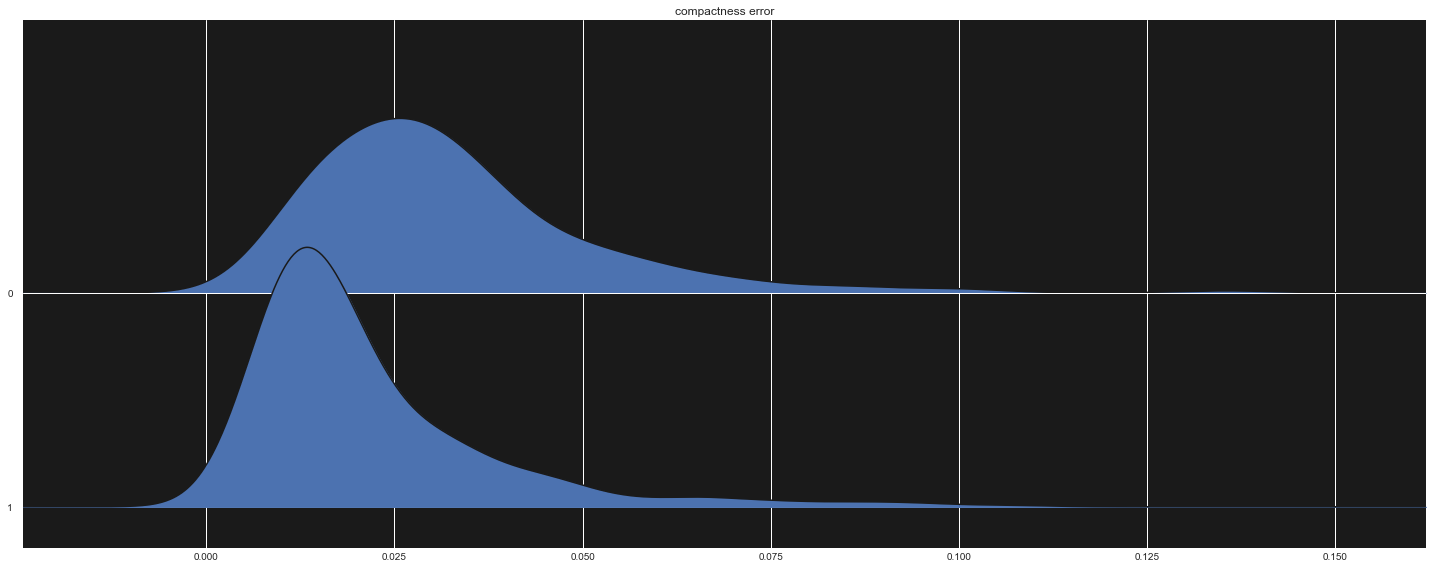

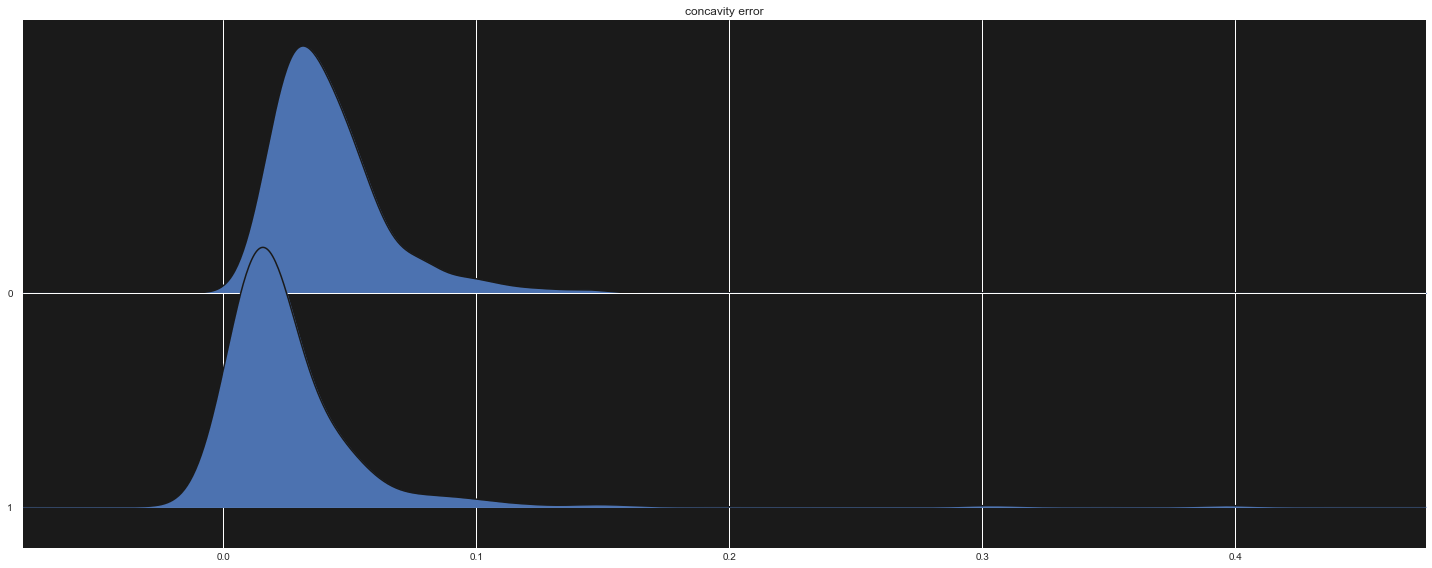

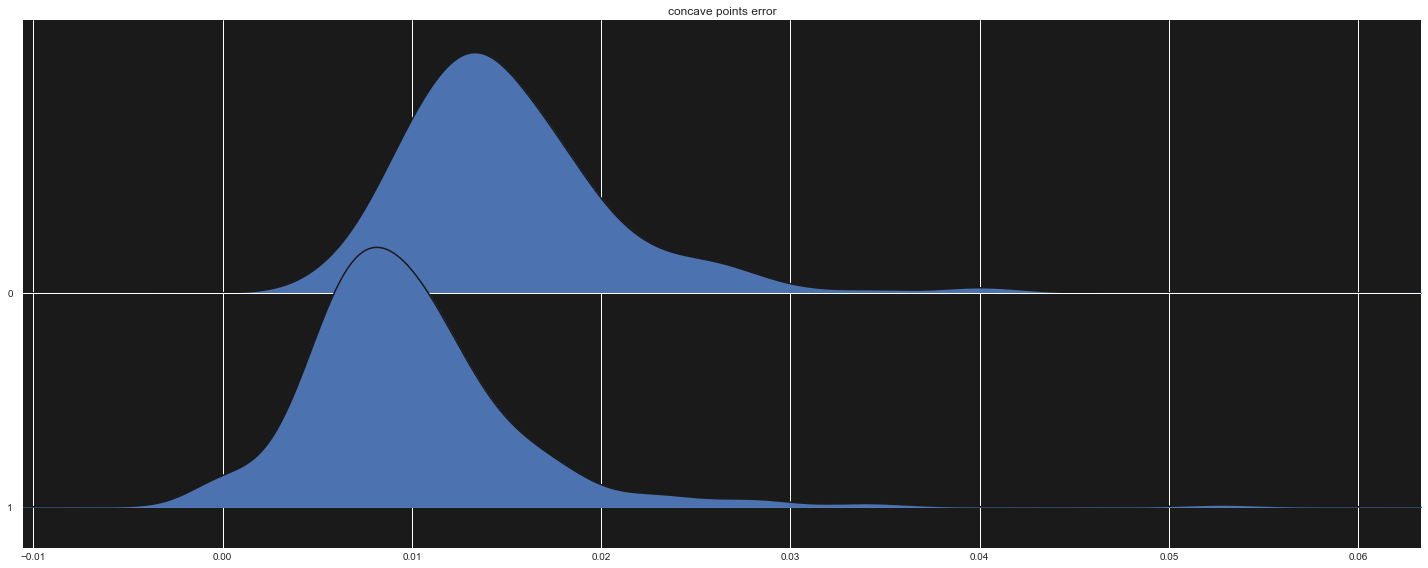

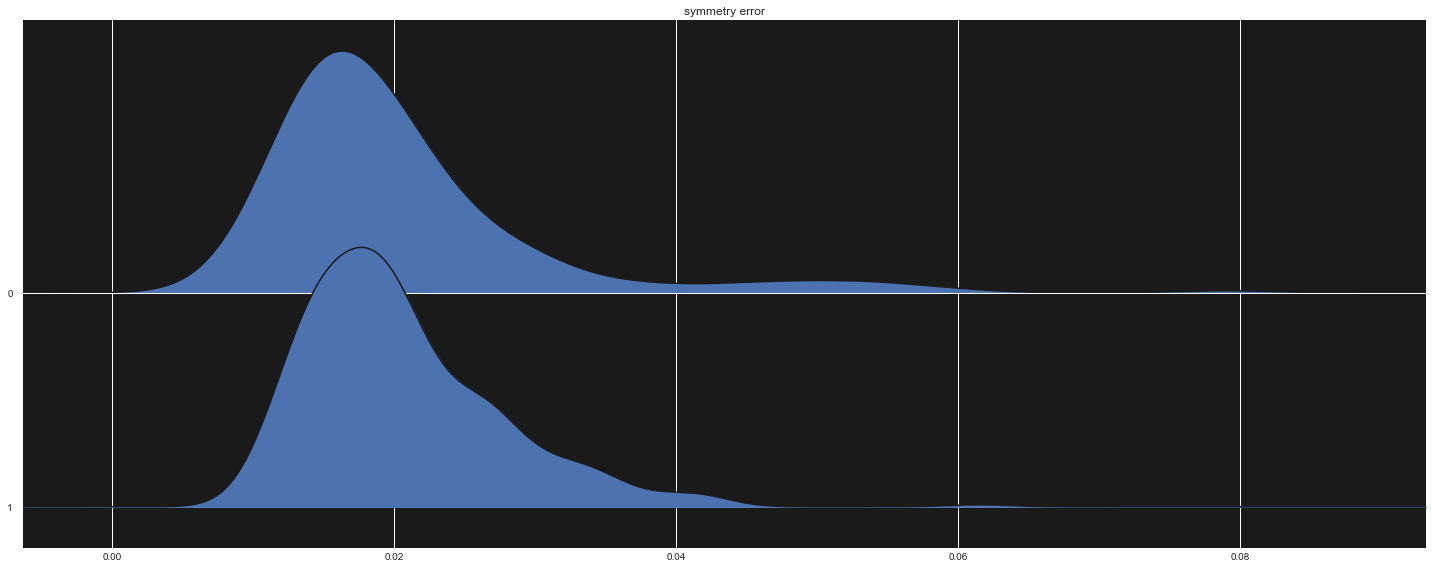

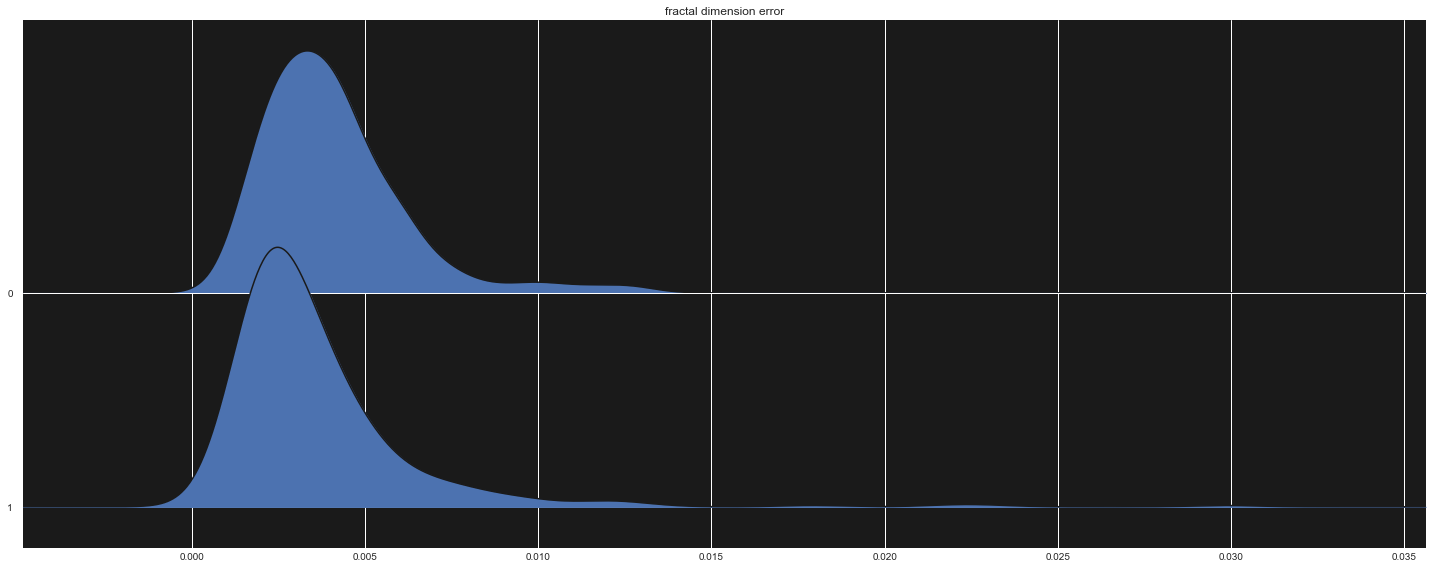

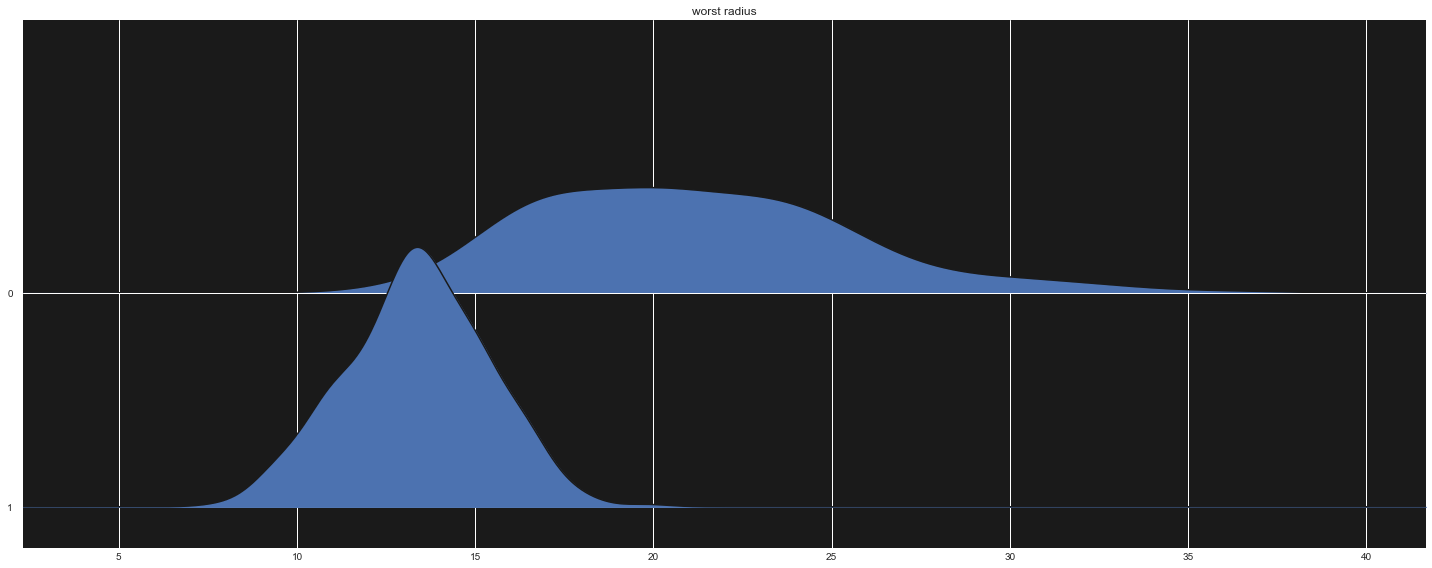

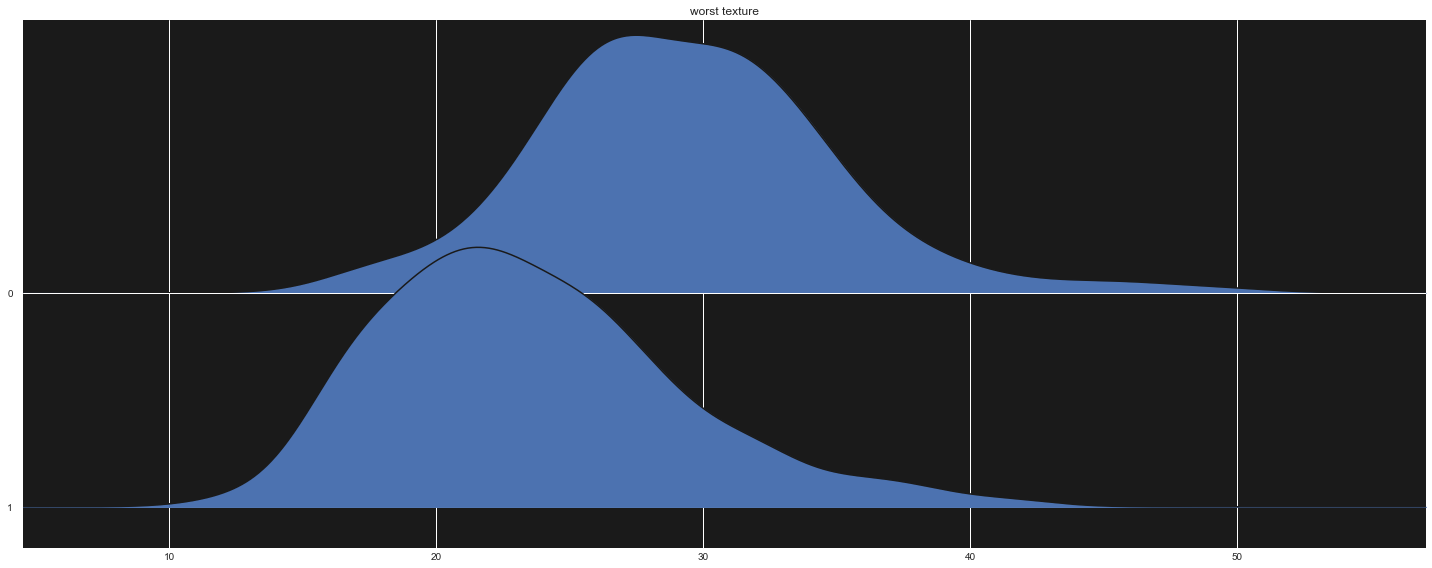

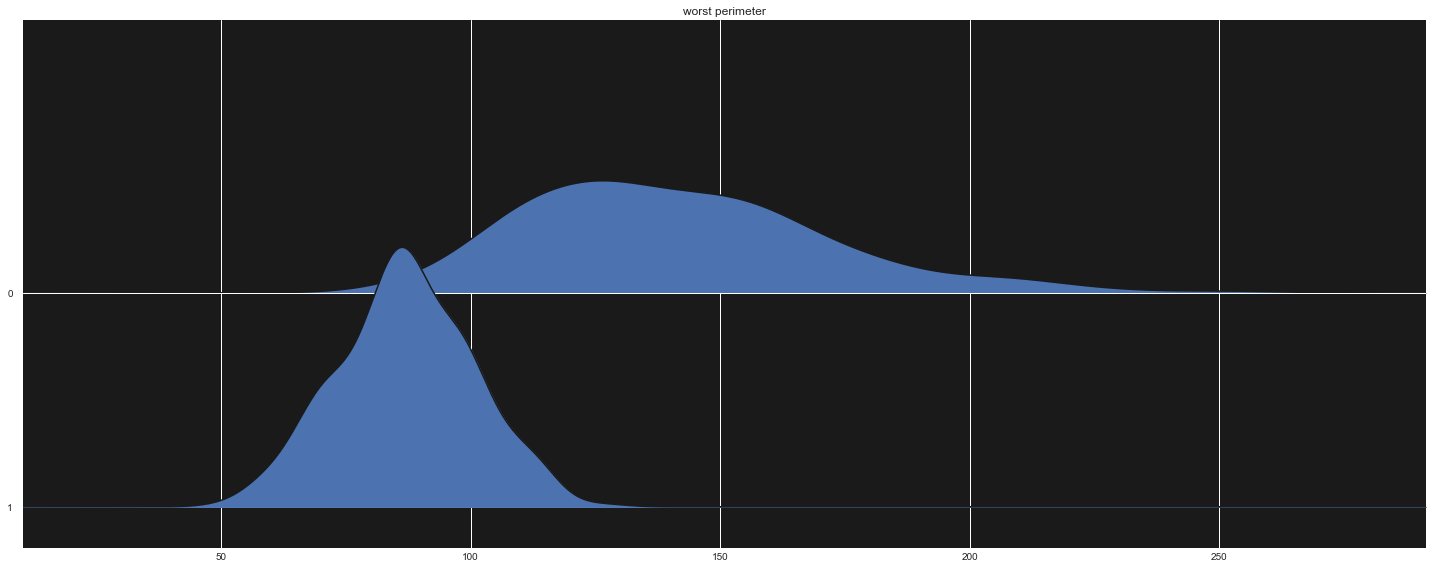

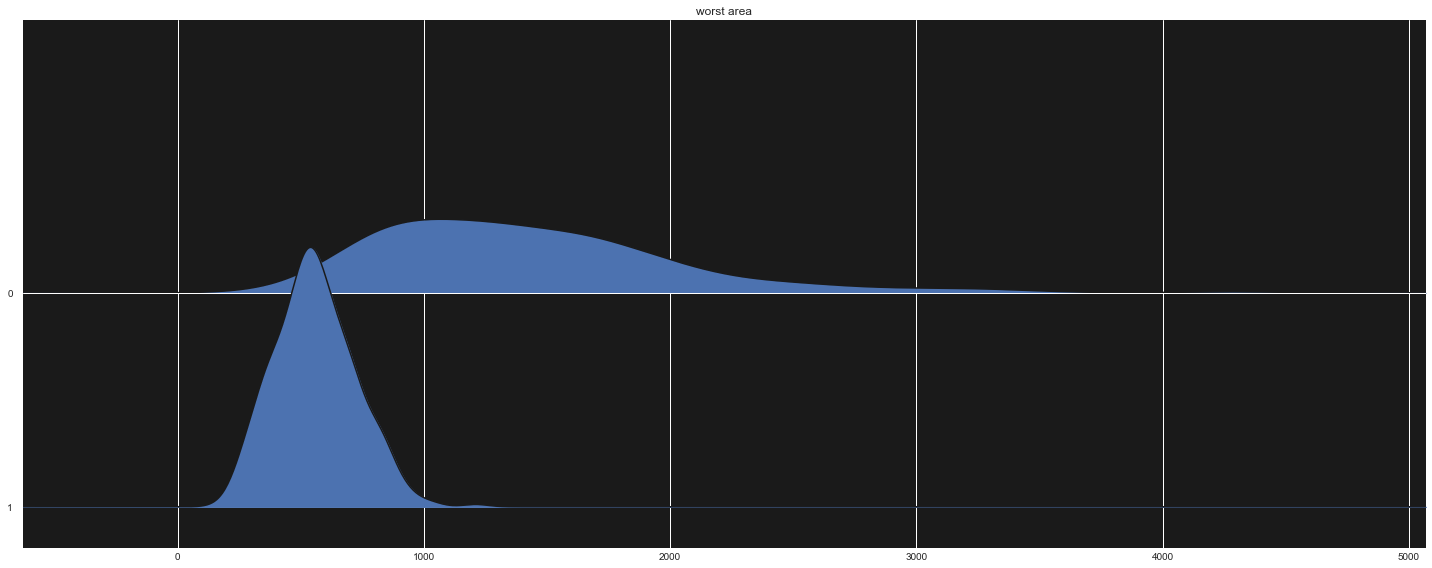

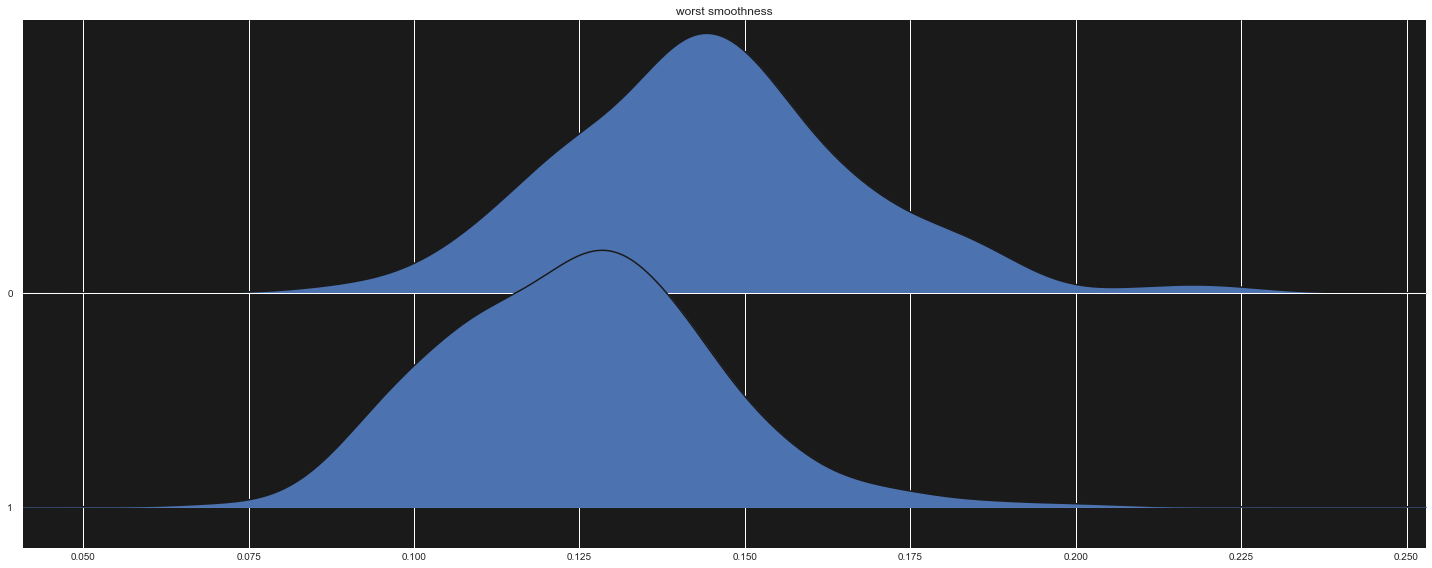

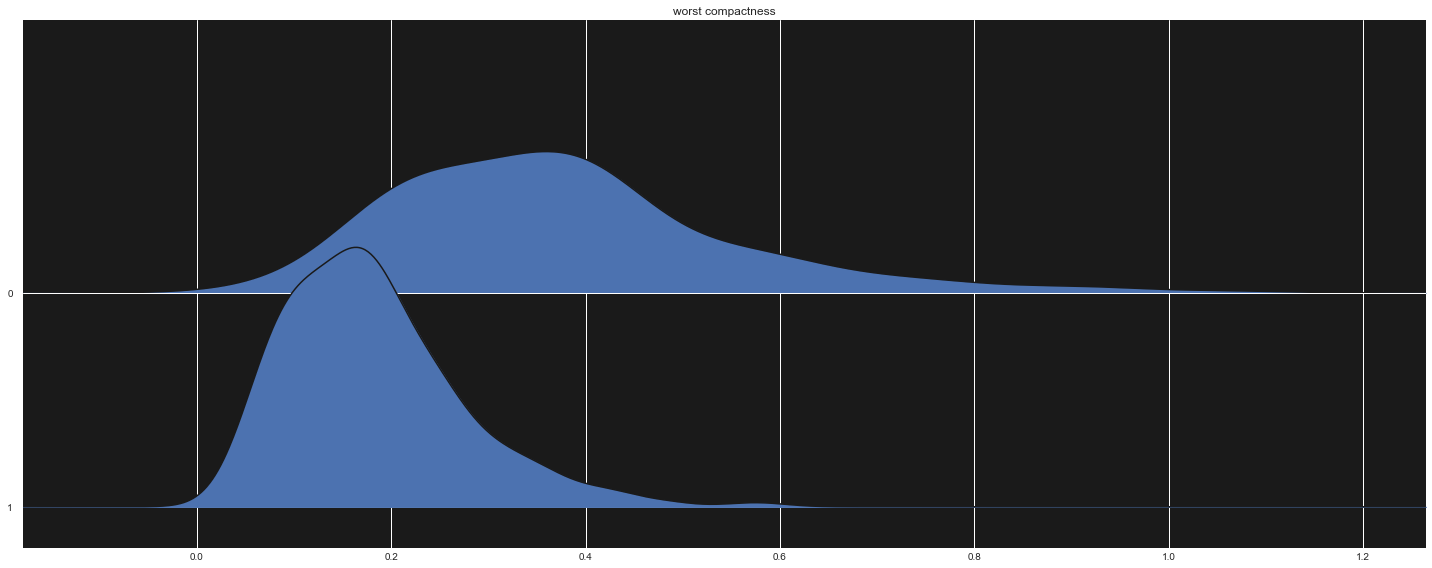

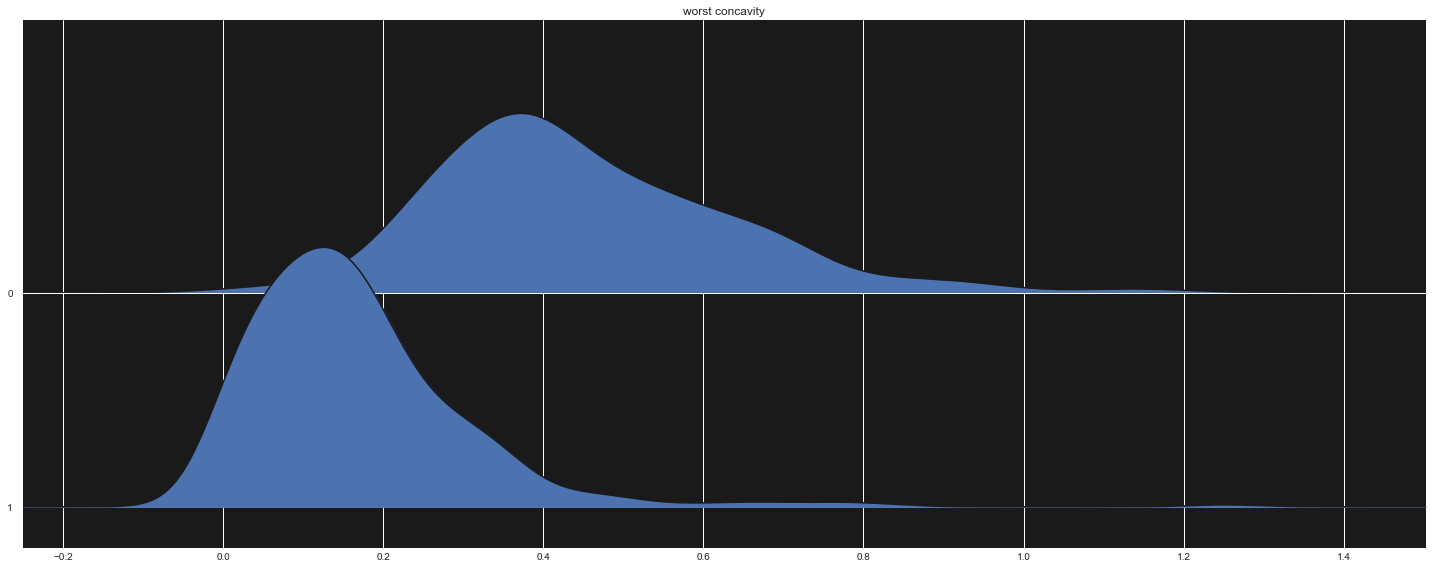

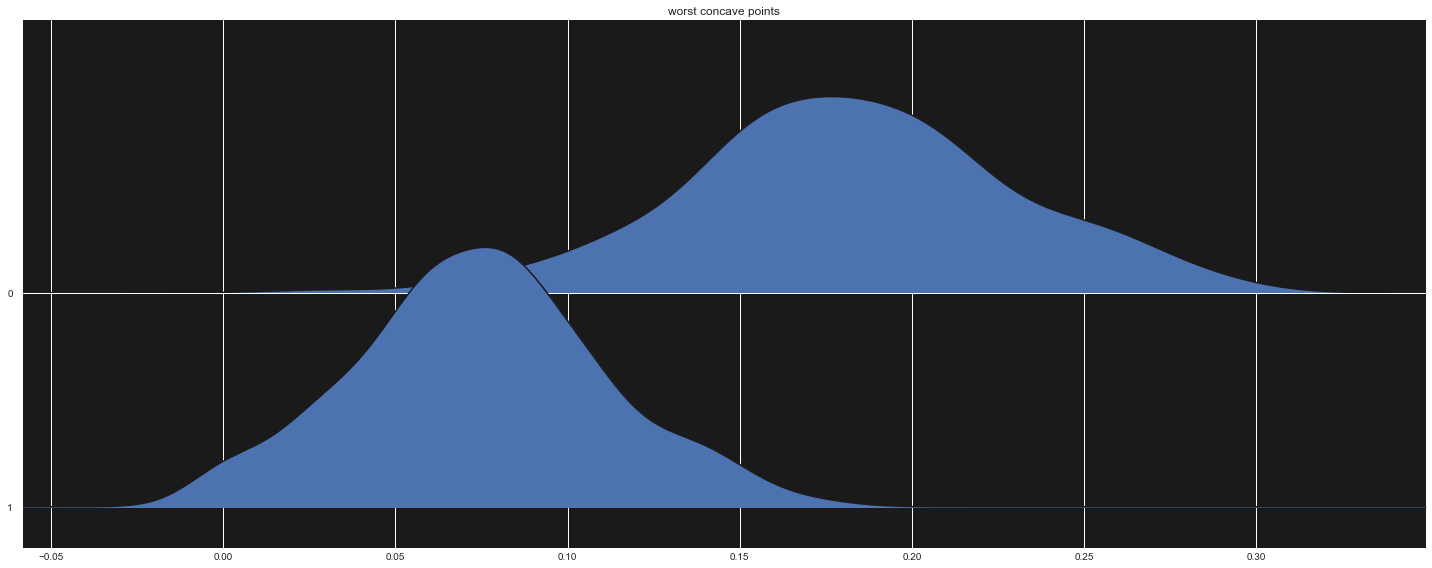

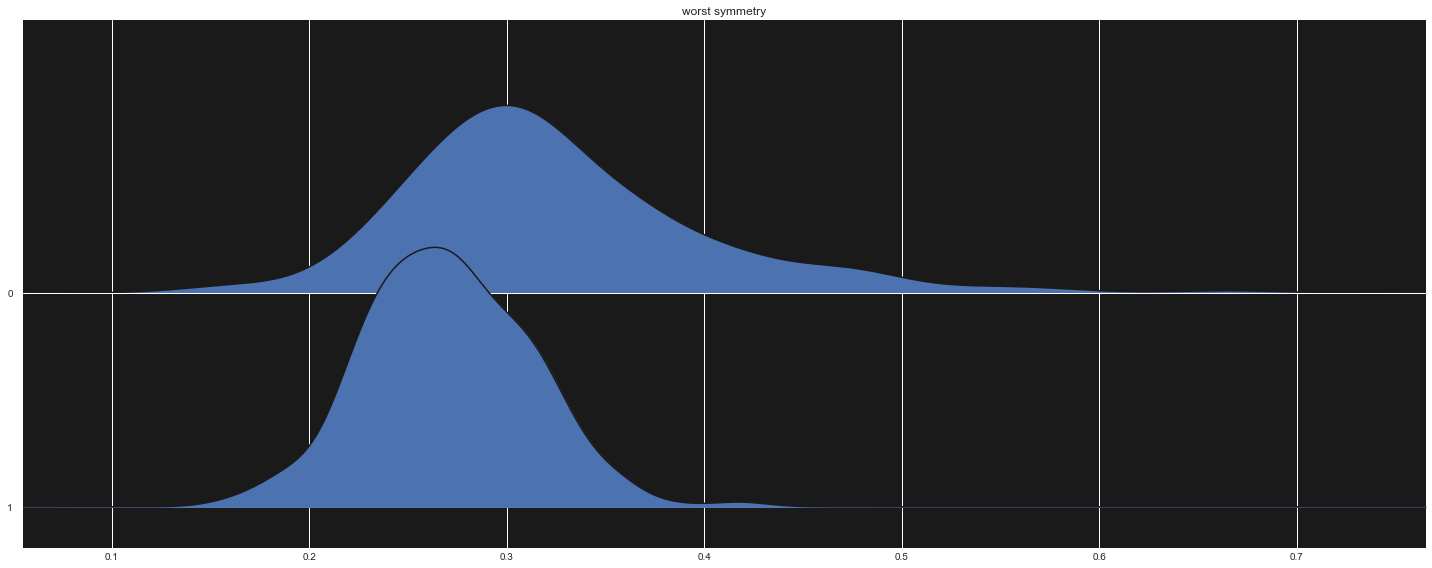

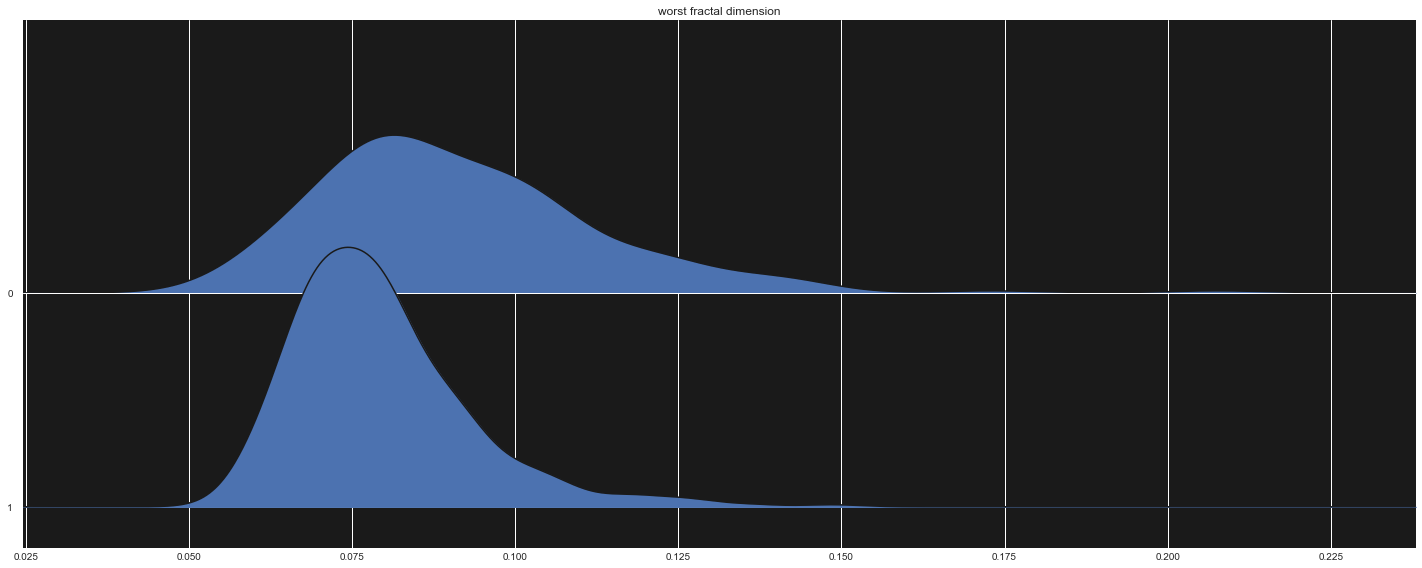

In [60]:
SIZE = (20,8)
for col in used_cols:
    fig, axes = joypy.joyplot(df, 
                              by=target,
                              column=col,
    #                           hist=True,
    #                           bins=100,
    #                           fade=True,
                              background='k',
                              ylim='max',
                              overlap=2,
                              grid=True,
                              legend=False,
                              title=col,
                              figsize=SIZE)
    plt.tight_layout()
    plt.show()

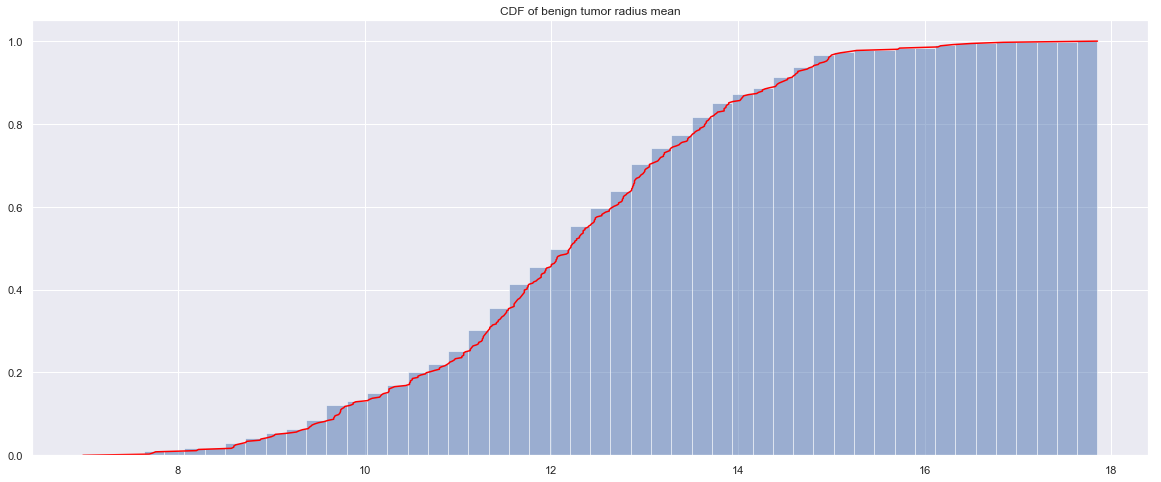

In [65]:
# look at benign group
plt.figure(figsize=SIZE)
plt.hist(df[df[target]==1]['mean radius'],
         bins=50,
         label='Benign',
         normed = True,
         cumulative = True,
#          background='k',
         alpha=0.5)
sorted_data = np.sort(df[df[target]==1]['mean radius'])
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,
         y, color='red')
plt.title('CDF of benign tumor radius mean')
plt.tight_layout()
plt.show()

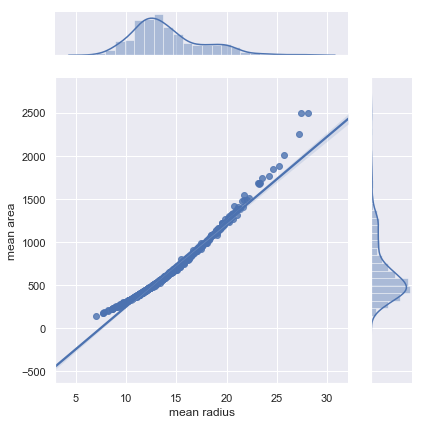

In [73]:
sns.jointplot(df['mean radius'],
              df['mean area'], 
              kind="regg")
plt.tight_layout()
plt.show()

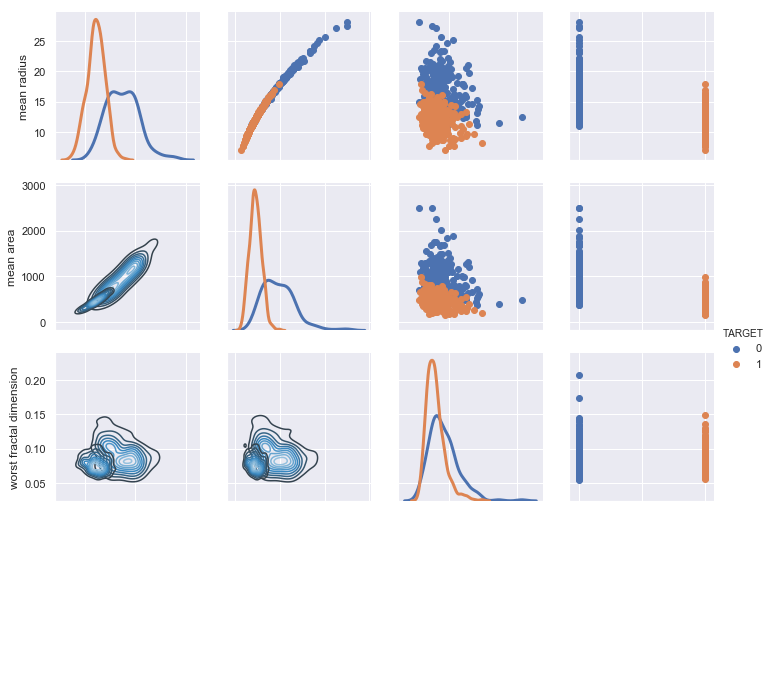

In [98]:
tmp_df = df.loc[:,["mean radius",
                   "mean area",
                   "worst fractal dimension",
                   target]]

g = sns.PairGrid(tmp_df, hue=target,
                 diag_sharey=False,)
g.map_lower(sns.kdeplot,
            cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,
           lw =3)
for i in range(4):
    g.axes[3,i].set_visible(False)
g.add_legend()
# plt.tight_layout()
plt.show()

In [88]:
from sklearn.mixture import GaussianMixture as GMM

In [90]:
# GMM?

In [111]:
gmm = GMM(n_components=3)

In [112]:
gmm.fit(df[['radius error']])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

label
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

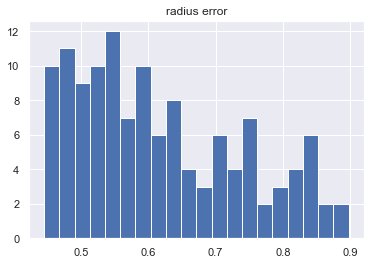

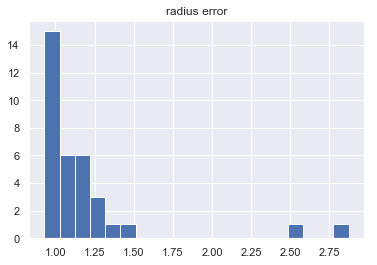

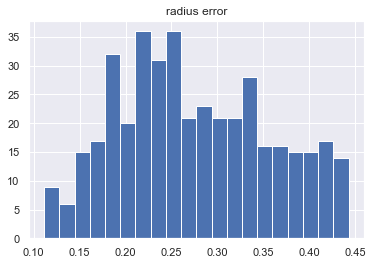

In [113]:
df['label'] = gmm.predict(df[['radius error']])
df[['label', 'radius error']].groupby('label').hist(bins=20)

# Transform Your Data

* Log-Transform
* Square-Root
* Exp-Transform
* Polynomial Transform
* $\dfrac{1+X}{1-X}$


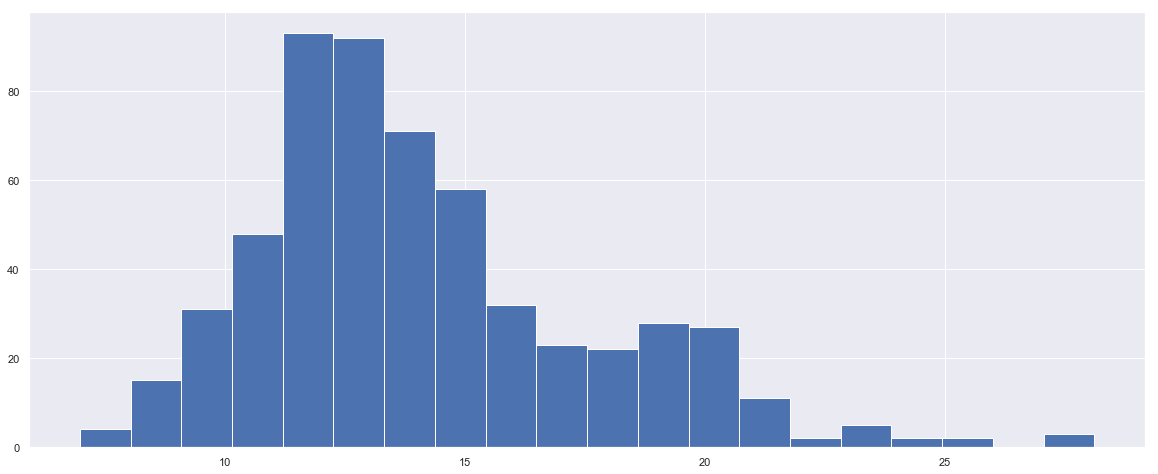

In [115]:
plt.figure(figsize=SIZE)
df['mean radius'].hist(bins=20)
plt.show()

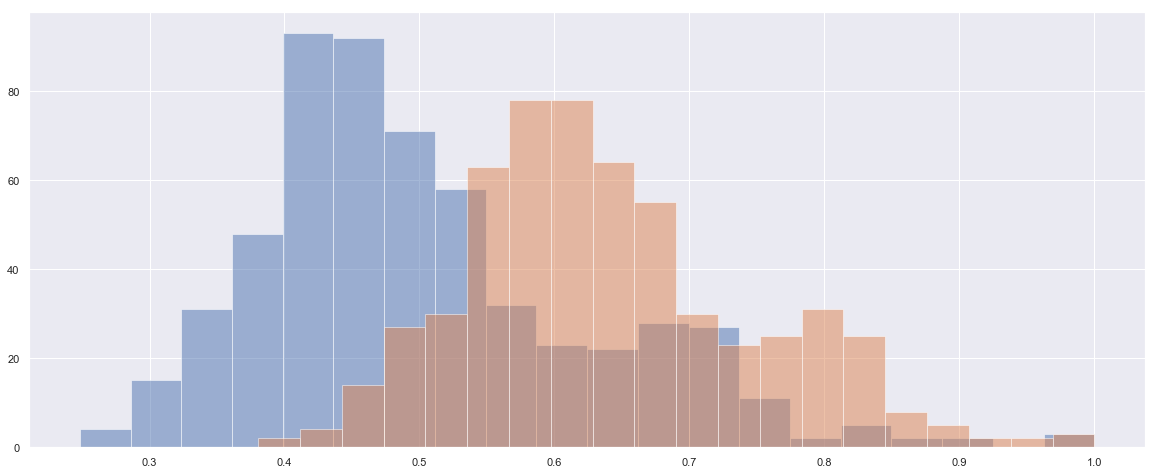

In [120]:
plt.figure(figsize=SIZE)
data1 = df['mean radius']
data1 /=  data1.max()

data2 = np.log1p(np.log1p(df['mean radius']))
data2 /= data2.max()

data1.hist(bins=20, alpha=0.5)
data2.hist(bins=20, alpha=0.5)
plt.show()

# Normal Distribution / Central Limit Theorem

* https://en.wikipedia.org/wiki/Central_limit_theorem

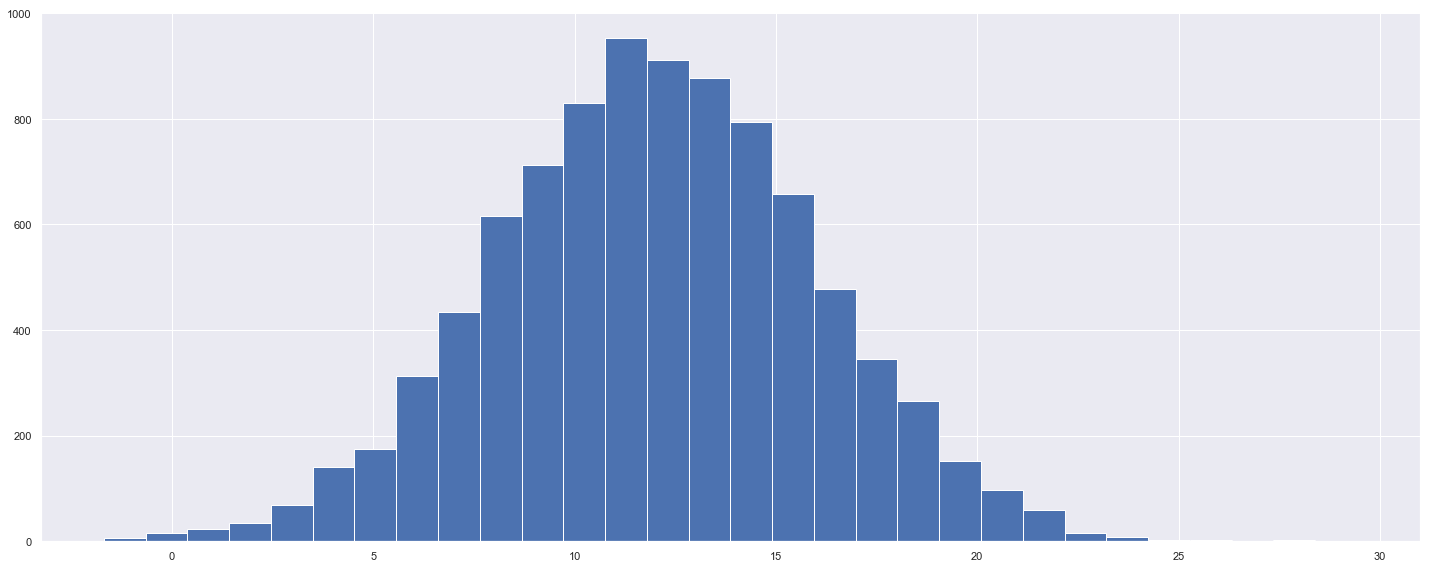

In [172]:
data = np.random.normal(12, 4, 9001)

plt.figure(figsize=SIZE)
plt.hist(data, bins=30)
plt.tight_layout()
plt.show()

$$
x = \textrm{(central tendency)} + \textrm{(step size)} \cdot \textrm{(spread)}
$$

$$
x = \mu + z \cdot \sigma
$$

$$
z = \frac{x - \mu}{\sigma}
$$

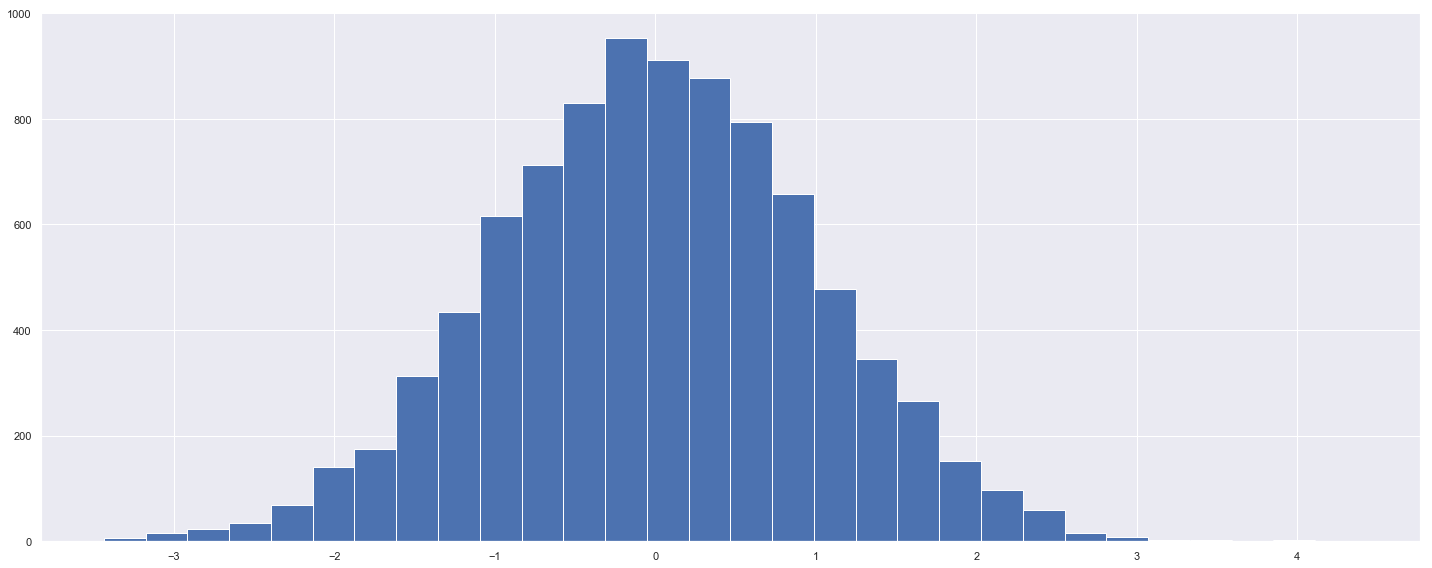

In [173]:
plt.figure(figsize=SIZE)
plt.hist((data - data.mean())/data.std(), bins=30)
plt.tight_layout()
plt.show()

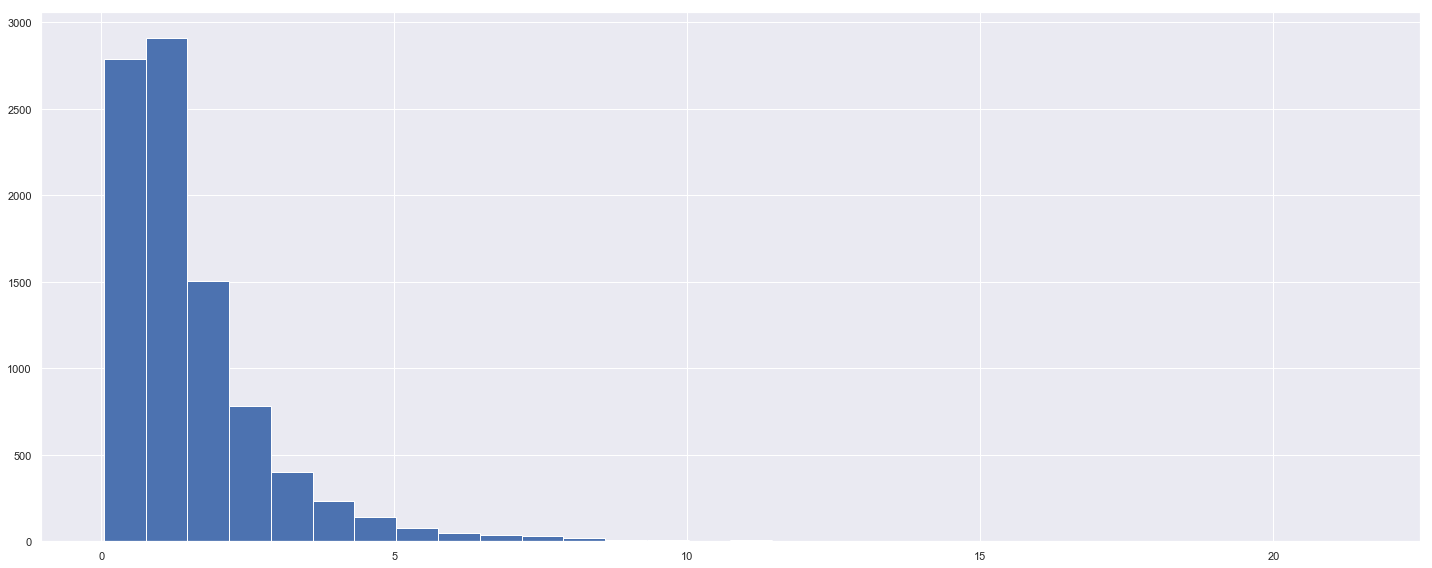

In [174]:
data = np.random.lognormal(.12, .8, 9001)

plt.figure(figsize=SIZE)
plt.hist(data, bins=30)
plt.tight_layout()
plt.show()

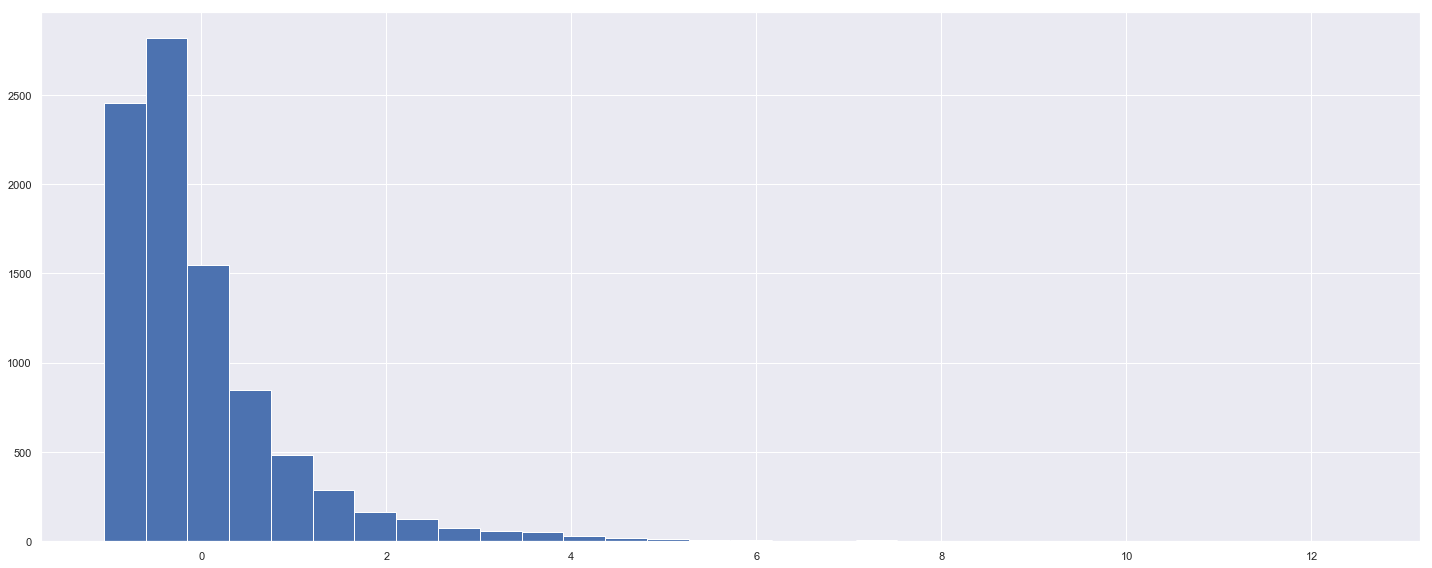

In [168]:
plt.figure(figsize=SIZE)
plt.hist((data - data.mean())/data.std(), bins=30)
plt.tight_layout()
plt.show()

In [169]:
from astropy.stats import median_absolute_deviation as mad

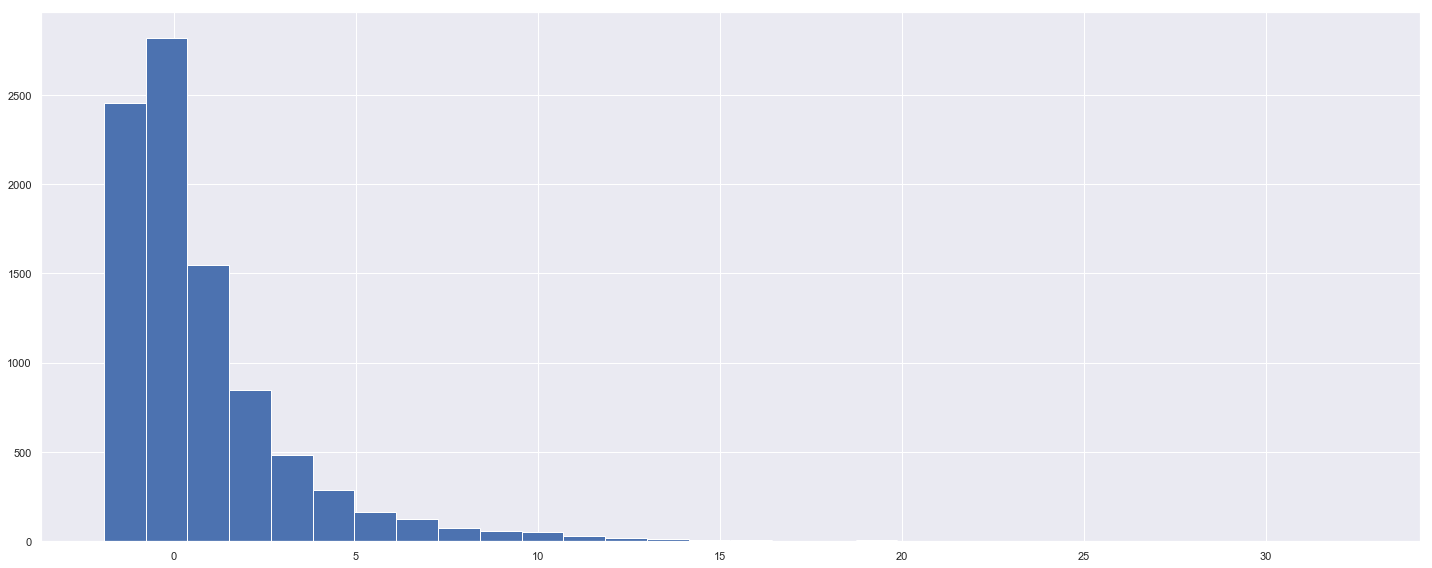

In [170]:
plt.figure(figsize=SIZE)
plt.hist((data - np.median(data))/mad(data), bins=30)
plt.tight_layout()
plt.show()

In [123]:
# generate random dice rolls
from numpy.random import seed, randint

# seed the random number generator
seed(42)

# generate a sample of die rolls
rolls = randint(1, 7, 50)
print(rolls)
print(np.mean(rolls))

[4 5 3 5 5 2 3 3 3 5 4 3 6 5 2 4 6 6 2 4 5 1 4 2 6 5 4 1 1 3 3 2 4 4 6 6 6
 3 4 4 1 3 5 3 5 1 2 4 1 4]
3.66


(array([  3.,  19.,  76., 163., 243., 260., 141.,  68.,  22.,   5.]),
 array([2.72 , 2.878, 3.036, 3.194, 3.352, 3.51 , 3.668, 3.826, 3.984,
        4.142, 4.3  ]),
 <a list of 10 Patch objects>)

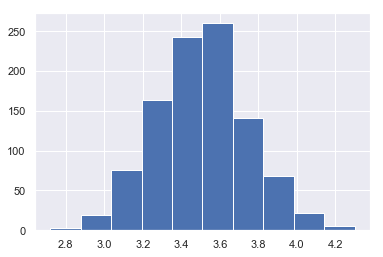

In [125]:
# calculate the mean of 50 dice rolls 1000 times
means = [np.mean(randint(1, 7, 50)) for _ in range(1000)]

plt.hist(means)

In [126]:
from scipy.stats import sem, t

confidence = 0.95

n = len(means)
m = np.mean(means)
std_err = sem(means)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

lb = m - h
ub = m + h
print(lb, ub)

3.4930977725879764 3.5233022274120236


In [177]:
means = [np.mean(np.random.choice(data, 50)) for _ in range(1000)]

n = len(means)
m = np.mean(means)
std_err = sem(means)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

lb = m - h
ub = m + h
print(lb, ub)

1.5225010198584334 1.546699288718999
